# Car Insurance Data Analysis

## Exploratory Data Analysis

Exploratory Data Analysis (EDA) is an essential phase in any data engineering and analytics project. It helps in gaining an understanding of the dataset before diving into more detailed analysis. EDA involves summarizing the dataset's key features, identifying patterns, detecting outliers, and observing trends.

**Step 1: Examine the Data Structure**

- **Load the Data:** Begin by loading the dataset and analyzing its structure.
- **Check Dimensions:** Determine the number of rows and columns present in the dataset.
- **Preview the Data:** Review a sample of the initial records in the dataset.

In [60]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os
import sys
from importlib import reload

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [14]:
df = pd.read_csv('../data/data.csv', low_memory=False)

In [17]:
df.sample(5)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
52283,TransactionId_13109,BatchId_103464,AccountId_4407,SubscriptionId_3655,CustomerId_4864,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,3000.0,3000,2019-01-07T16:39:30Z,2,0
73066,TransactionId_49408,BatchId_5088,AccountId_4841,SubscriptionId_3829,CustomerId_1656,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-5000.0,5000,2019-01-25T18:23:34Z,2,0
1469,TransactionId_89325,BatchId_109466,AccountId_4841,SubscriptionId_3829,CustomerId_4920,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-200.0,200,2018-11-16T12:32:29Z,2,0
70552,TransactionId_47489,BatchId_56223,AccountId_2470,SubscriptionId_364,CustomerId_2886,UGX,256,ProviderId_5,ProductId_15,financial_services,ChannelId_3,10000.0,10000,2019-01-24T22:11:07Z,2,0
3405,TransactionId_133180,BatchId_94736,AccountId_4841,SubscriptionId_3829,CustomerId_2845,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-180.0,180,2018-11-19T11:46:39Z,2,0


# Data Overview:

- Provide a comprehensive overview of the dataset, including its shape, data types, and the presence of **any missing values**. Additionally, review the first few rows to get an initial sense of the data structure and potential patterns. This step should also include a quick check for any inconsistencies or anomalies in the data, offering insights into the need for preprocessing tasks such as data cleaning or transformation before further analysis.

In [15]:
print(df.dtypes)

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object


In [20]:
# Import the class CreditRiskEDA
from credit_risk_EDA import CreditRiskEDA
# Initialize the class
cr_eda = CreditRiskEDA(df)

# Overview of the dataset
if not df.empty:
    cr_eda.data_overview()


Dataset contains 95662 rows and 16 columns.

Data Types:
TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

Sample Data:
         TransactionId         BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871   BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770   BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203   BatchId_53941  AccountId_4229   SubscriptionId_222   
3    TransactionId_380  BatchId_102363   AccountId_648  SubscriptionId_2185   
4  Trans

### Key Insight:

- The dataset consists of 95,662 rows and 16 columns, offering a solid foundation for analysis. 
- While most data types are correctly assigned, the TransactionStartTime column is stored as an object and needs to be converted to datetime format for proper time-based analysis. 

Notably, there are no missing values across any columns, confirming that the dataset is complete and prepared for further exploration without requiring imputation.

In [21]:
# Convert the TransactionStartTime to appropriate datetime format
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])

#### Identify Duplicates

In [22]:
# Identify duplicates based on specified columns
duplicate_rows = df[df.duplicated(subset=['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 
                                           'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 
                                           'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 
                                           'PricingStrategy', 'FraudResult'], keep=False)]
duplicate_rows.shape

(317, 16)

In [23]:
# Keep the first occurrence of duplicates
df_cleaned = df.drop_duplicates(subset=['BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 
                                          'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 
                                          'ProductCategory', 'ChannelId', 'Amount', 'Value', 
                                          'TransactionStartTime', 'PricingStrategy', 'FraudResult'], 
                                 keep='first')

In [24]:
df_cleaned.shape

(95475, 16)

In [25]:
# Comfirm that there is no duplicates 
df_cleaned[df_cleaned.duplicated()]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult


In [26]:
df = df_cleaned.copy()
df.shape

(95475, 16)

## Summary Statistics

- Analyze the central tendency, dispersion, and distribution shape of the dataset to gain insights into its overall structure and variability.

- Evaluate key metrics such as mean, median, standard deviation, and skewness to understand how the data is spread and whether any transformations are needed.

In [27]:
# Statistical summary
summary_stats = cr_eda.summary_statistics()
display(summary_stats.T)

Summary Statistics:



,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000
median,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
mode,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000


### Key Observations:

- The CountryCode column is constant at 256, showing no variability.

- Both Amount and Value features exhibit significant skewness (over 51), suggesting the presence of outliers or heavy-tailed distributions.

- The PricingStrategy feature is stable, with most values concentrated around 2.

- FraudResult has a very low mean, indicating a low frequency of fraudulent transactions, and shows a highly positive skewness, implying that most values are zeros.

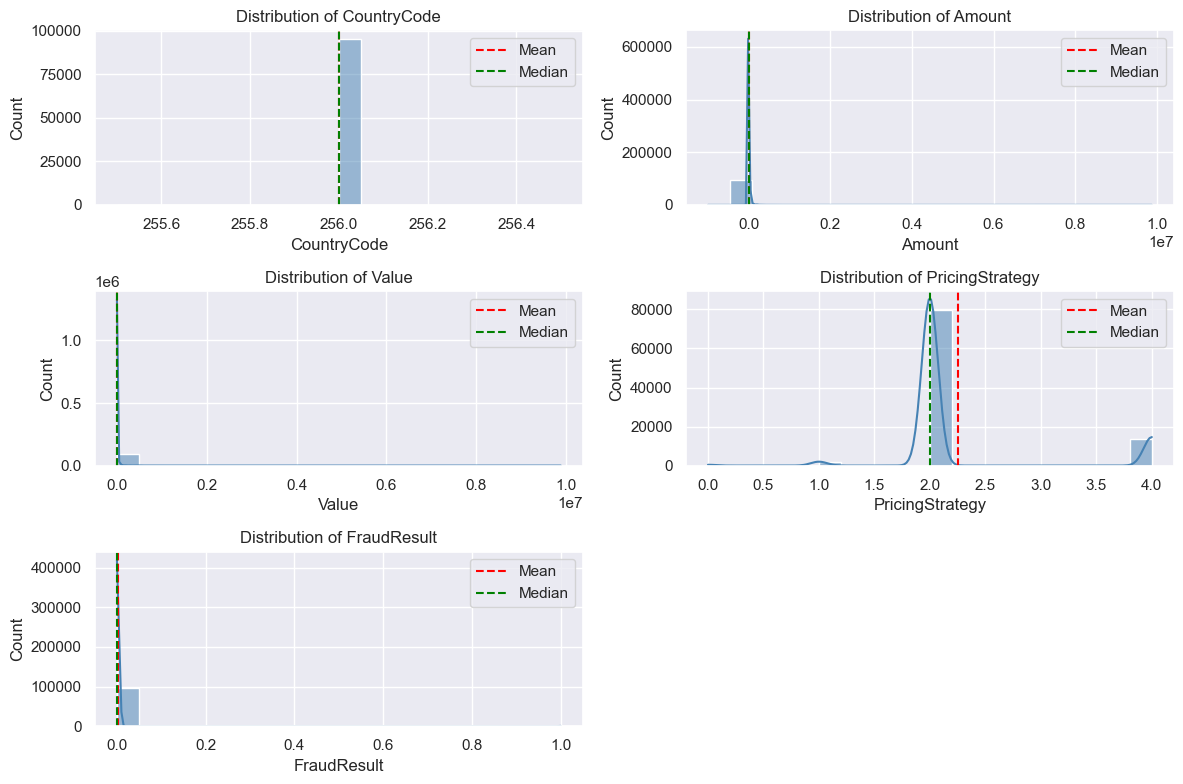

In [61]:
# Create instance
cr_eda = CreditRiskEDA(df)

# Call the method without specifying columns
cr_eda.plot_numerical_distribution()

### Key Insights:

- **CountryCode Distribution:** The CountryCode column shows no variability, with a constant value of 256 across the dataset.

- **Amount Distribution:** The Amount feature exhibits a high skewness, with the majority of values concentrated near zero and a long tail towards higher values, indicating possible outliers or a heavy-tailed distribution.

- **Value Distribution:** Similar to Amount, the Value feature shows a strong skew, with most values clustered around zero and a few extreme outliers, suggesting a non-normal distribution.

- **PricingStrategy Distribution:** The PricingStrategy variable is largely concentrated around the value 2, with a small number of occurrences at the higher end, indicating that most data points fall within a specific strategy.

- **FraudResult Distribution:** The FraudResult feature has a very low occurrence of fraudulent transactions (close to zero), with a high concentration of zeros, implying that fraud is rare in the dataset.

These insights highlight the need for potential data transformation techniques such as log transformation or outlier handling, especially for highly skewed variables like Amount and Value.

## Skewness


In [62]:
numeric_df = df.select_dtypes(include='number')
skewness = numeric_df.skew().sort_values(ascending=False)


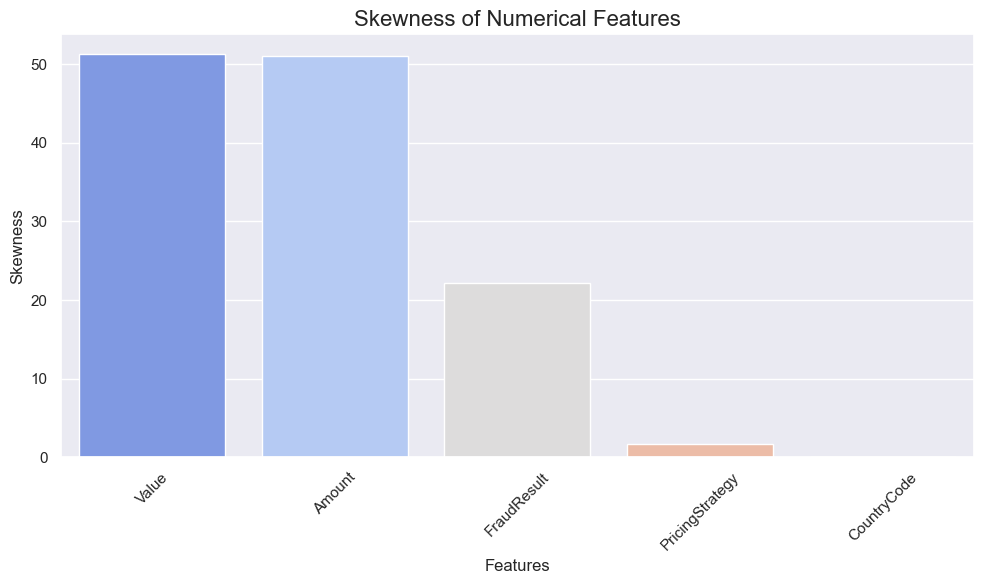

In [63]:
# Plot skewness
plt.figure(figsize=(10, 6))
sns.barplot(
        x=skewness.index,
        y=skewness.values,
        hue=skewness.index,
        palette='coolwarm',
        dodge=False,
        legend=False
    )
plt.title("Skewness of Numerical Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Skewness", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Key insights:**

#### Value and Amount

- **High Skewness:** Both features have very high skewness, indicating that their distributions are heavily skewed, likely with long tails. This suggests the presence of outliers or a concentration of data points at lower values.

#### FraudResult
- **Moderate Skewness:** This feature has moderate skewness, which might imply a less extreme but still significant imbalance in data distribution.

#### PricingStrategy
- **Low Skewness:** The skewness is minimal, indicating a relatively symmetric distribution.

#### CountryCode
- **Negligible Skewness:** This feature shows essentially no skewness, suggesting a balanced distribution across categories.

### Overall Insights

**Data Preprocessing Needs:** High skewness in some features indicates a need for transformation (e.g., log or square root) to normalize the data, especially for Value and Amount, to improve model performance.

**Feature Engineering:** Understanding skewness helps in deciding which features might need scaling or other adjustments for better predictive modeling.

## Distribution of Categorical Features

c:\Users\Hello\Desktop\Html-Tutorial\Document\KAIM-Courses\Alphacare_Insurance_Solutions\scripts\credit_risk_EDA.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[i].set_title(f"Distribution of {col}")
c:\Users\Hello\Desktop\Html-Tutorial\Document\KAIM-Courses\Alphacare_Insurance_Solutions\scripts\credit_risk_EDA.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes[i].set_title(f"Distribution of {col}")
c:\Users\Hello\Desktop\Html-Tutorial\Document\KAIM-Courses\Alphacare_Insurance_Solutions\scripts\credit_risk_EDA.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effec

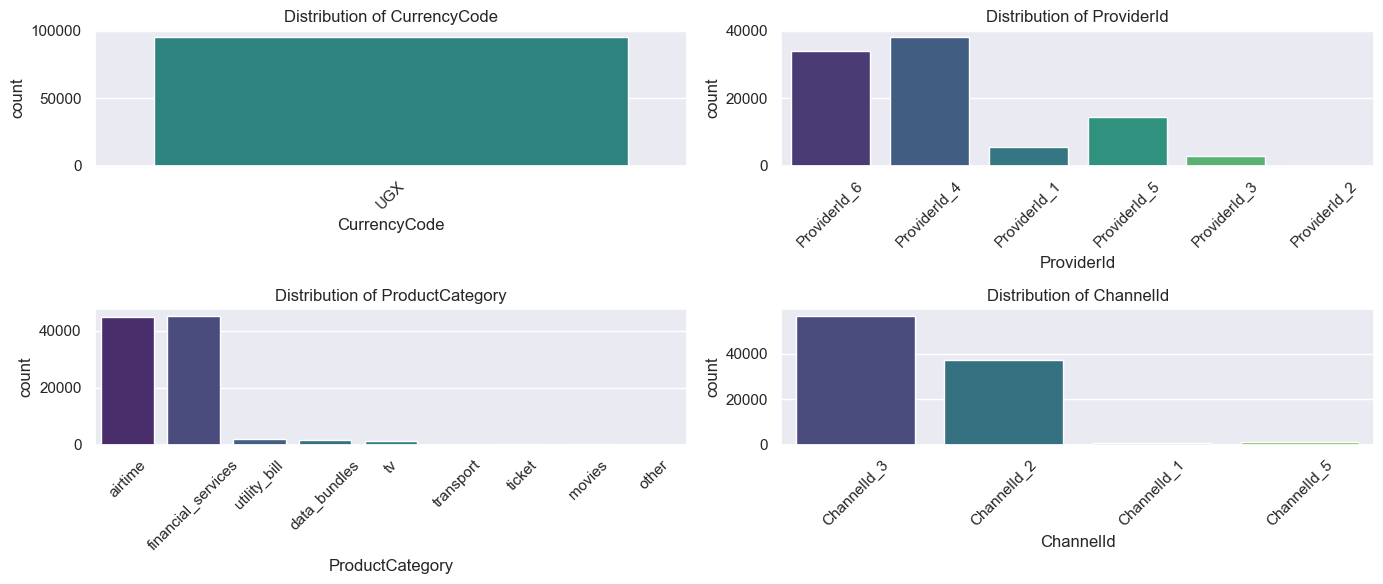

In [64]:
cr_eda.plot_categorical_distribution()

#### **Key Insights:**

**CurrencyCode**

- **Dominance of UGX:** The data is heavily skewed towards a single currency, UGX, indicating limited currency diversity.

**ProviderId**

- **Concentration in Few Providers:** Provider 4 and Provider 6 account for most transactions, suggesting a strong reliance on these providers.

**ProductCategory**

- **Prominent Categories:** "Airtime" and "Financial Services" are the most common categories, with significantly fewer transactions in others like "TV" and "Movies."

**ChannelId**

- **Channel 3 Prevalence:** Most transactions occur through Channel 3, with Channel 2 also being significant, while others see minimal use.

#### Overall Insights

- **Imbalance in Data:** There is a noticeable imbalance in each category, which may influence modeling and require techniques to address potential biases.
- **Focus Areas:** Understanding these distributions can help tailor strategies for marketing, risk assessment, or resource allocation towards dominant categories and channels.

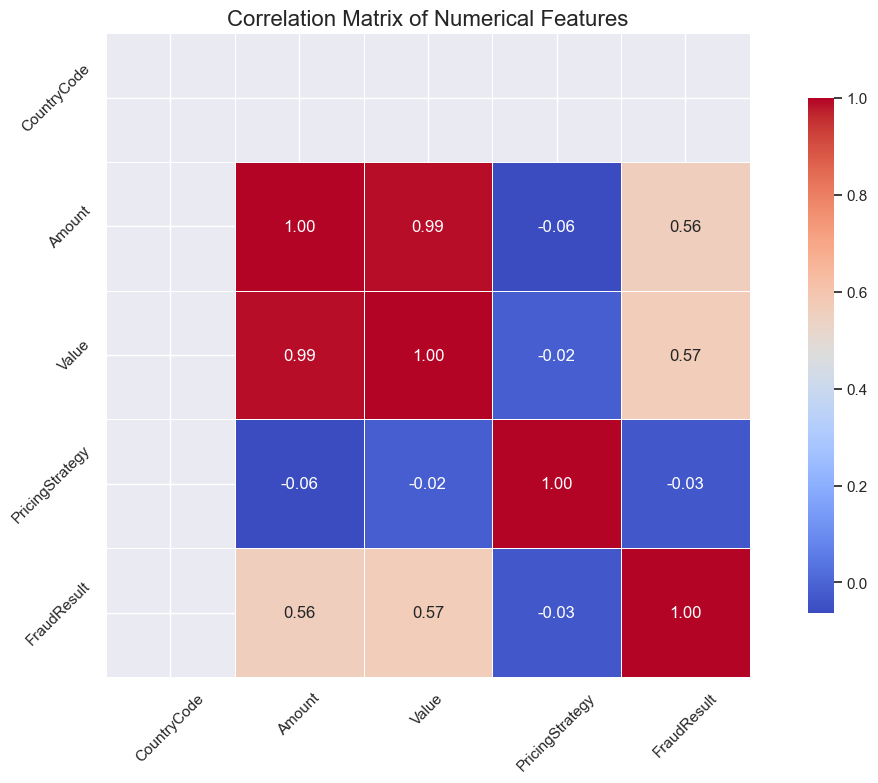

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select numerical columns for correlation analysis
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)

# Title and labels
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()

**Key Insights:**

- Amount and Value has strong positive correlation since they provide the same information. Value has no significance for future modeling

- Amount and FraudResults has moderate correlation

- PricingStrategy and Other features has no correlation

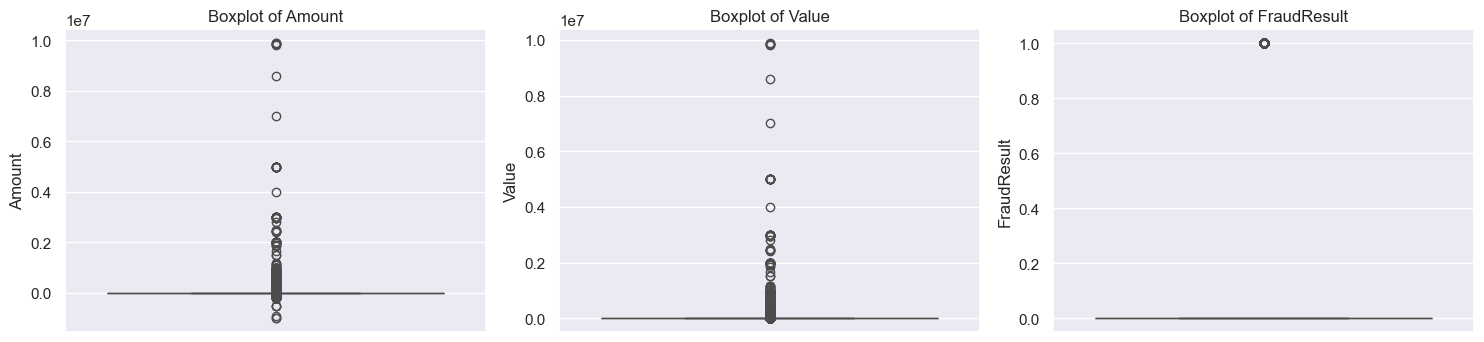

In [71]:
cols = ['Amount', 'Value', 'FraudResult']
# num_cols = self.df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='orange')
    plt.title(f'Boxplot of {col}', fontsize=12)
plt.tight_layout()
plt.show()

### **Key Insighs:**

**Amount and Value**
- **Presence of Outliers:** Both features have numerous outliers, indicating that some transactions have significantly higher values than the rest.
- **Concentration of Data:** Most data points are clustered near the lower end, suggesting a right-skewed distribution.

**FraudResult**
- **Binary Distribution:** The boxplot shows a highly concentrated distribution at zero, with a few points at one, indicating that fraudulent cases are rare compared to non-fraudulent ones.

### Overall Insights
**Data Skewness:** The skewness and outliers in Amount and Value suggest the need for transformation or robust methods to handle extreme values in analysis.

**Imbalance in Fraud Results:** The rarity of fraud cases indicates a potential imbalance, which might require techniques like resampling for effective modeling.

[15/Nov/2024 18:49:37] INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
[15/Nov/2024 18:49:38] INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


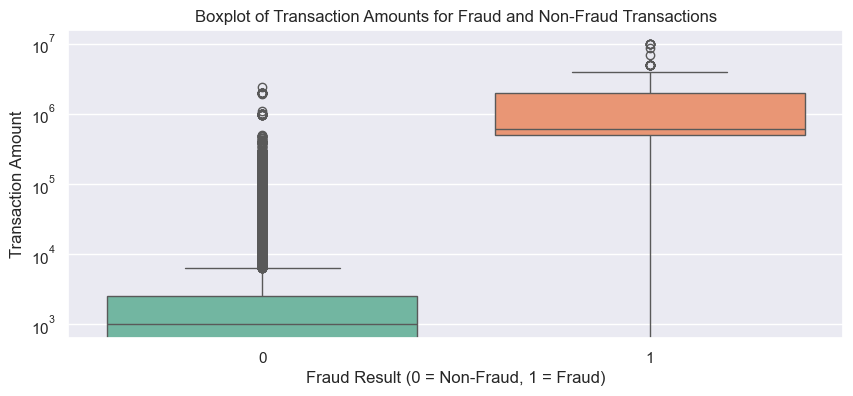

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a plot to visualize the relationship between Amount and FraudResult
plt.figure(figsize=(10, 4))

# Plotting boxplot to compare Amount for FraudResult = 1 (fraudulent) and FraudResult = 0 (non-fraudulent)
sns.boxplot(x='FraudResult', y='Amount', hue='FraudResult', legend=False,data=df, palette="Set2")

plt.title('Boxplot of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.xlabel('Fraud Result (0 = Non-Fraud, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.yscale('log')  # Using log scale to handle the large range of amounts

plt.show()

**Non-Fraud Transactions (0)**

- **Lower Transaction Amounts:** The majority of non-fraudulent transactions have lower amounts.
- **Presence of Outliers:** There are several outliers with higher amounts, indicating some variability in non-fraud transactions.

**Fraud Transactions (1)**
- **Higher Transaction Amounts:** Fraudulent transactions tend to have significantly higher amounts, suggesting that larger transactions are more likely to be fraudulent.
- **Less Variability:** The range is narrower compared to non-fraud transactions, indicating more consistency in the higher transaction amounts for fraud.

### Overall Insights
- **Risk Indicator:** The higher amounts in fraud transactions could be used as a risk indicator for detecting potential fraud.
- **Modeling Implications:** The distinction in transaction amounts between fraud and non-fraud suggests that transaction amount is a valuable feature for fraud detection models.

FraudResult      0    1  Total
AmountRange                   
<1K          23845    1  23846
1K-5K        17275    0  17275
5K-10K       10020    0  10020
10K-50K       4840    3   4843
50K-100K       639    9    648
>100K          479  175    654
Total        57098  188  57286


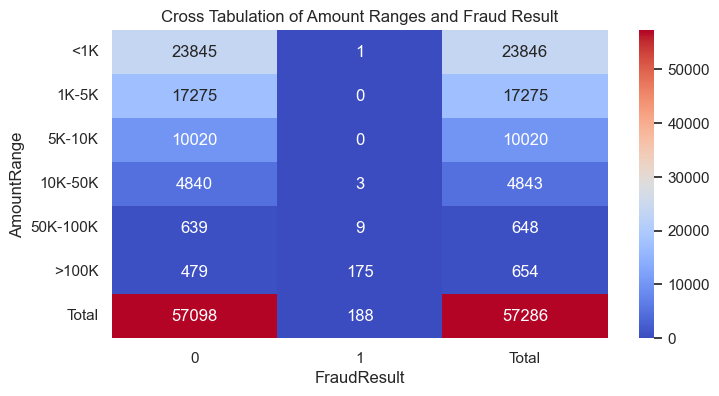

In [73]:
# Define bins for Amount ranges
bins = [0, 1000, 5000, 10000, 50000, 100000, df['Amount'].max()]
labels = ['<1K', '1K-5K', '5K-10K', '10K-50K', '50K-100K', '>100K']
df_new = df.copy()
# Create a new column with binned Amount
df_new['AmountRange'] = pd.cut(df_new['Amount'], bins=bins, labels=labels, include_lowest=True)

# Create a cross-tabulation
cross_tab = pd.crosstab(df_new['AmountRange'], df_new['FraudResult'], margins=True, margins_name="Total")
print(cross_tab)

# Optional: Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(cross_tab, annot=True, cmap='coolwarm', fmt='g')
plt.title('Cross Tabulation of Amount Ranges and Fraud Result')
plt.show()

In [75]:
df.to_csv('../data/data_eda.csv')